In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 10s 1us/step


In [3]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.2686 - acc: 0.9188 - val_loss: 0.0559 - val_acc: 0.9807
Epoch 2/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0866 - acc: 0.9744 - val_loss: 0.0385 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0666 - acc: 0.9807 - val_loss: 0.0367 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0530 - acc: 0.9840 - val_loss: 0.0330 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.0467 - acc: 0.9863 - val_loss: 0.0346 - val_acc: 0.9885
Epoch 6/12
60000/60000 [==============================] - 4s 72us/step - loss: 0.0420 - acc: 0.9876 - val_loss: 0.0297 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 4s 61us/step - loss: 0

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)

In [10]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026558304359853718
Test accuracy: 0.9918


In [11]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import shap
import numpy as np

In [12]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 300, replace=False)]

In [13]:
print(x_train.shape[0])

60000


In [14]:
print(background.shape)

(300, 28, 28, 1)


In [15]:
# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)

In [16]:
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:6])

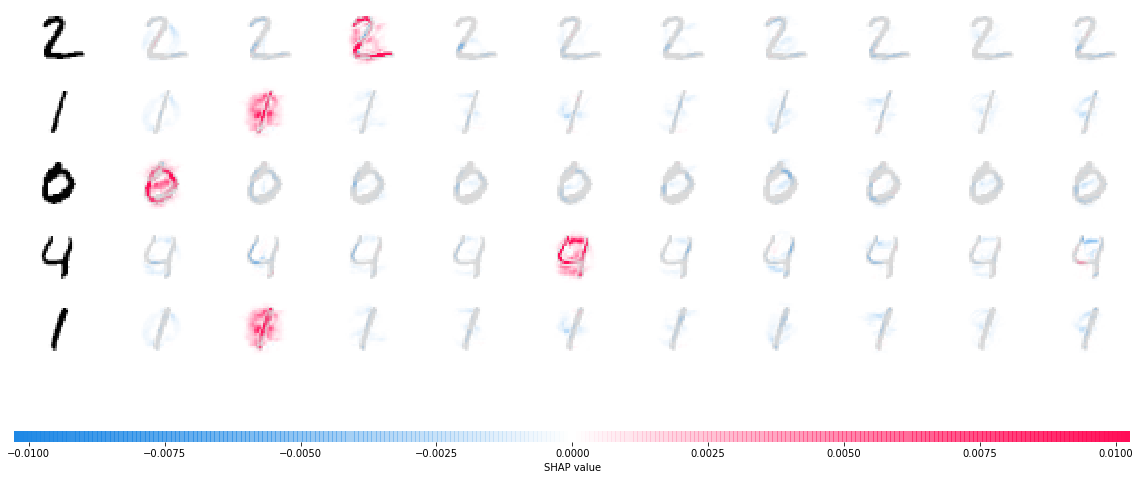

In [17]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:6])

In [18]:
y_pred = model.predict(x_test)

In [19]:
y_pred_classes = np.argmax(y_pred, axis = 1) 

In [20]:
print(y_pred_classes)

[7 2 1 ... 4 5 6]


In [21]:
y_true = np.argmax(y_test, axis = 1) 

In [22]:
print(y_true)

[7 2 1 ... 4 5 6]


In [23]:
errors = (y_pred_classes - y_true != 0)

In [24]:
print (errors)

[False False False ... False False False]


In [25]:
fail_index, = np.where(errors == 1)

In [26]:
print(fail_index)

[ 247  321  445  449  582  659  844  938  947 1014 1039 1226 1232 1242
 1247 1260 1319 1414 1522 1527 1530 1549 1709 1901 2035 2098 2118 2129
 2130 2135 2182 2293 2462 2488 2597 2654 2896 2921 2927 2939 3030 3060
 3073 3225 3422 3503 3520 3534 3726 3767 3780 3808 3906 3941 4176 4201
 4205 4571 4639 4740 4761 4807 4814 4823 5265 5937 5955 6597 6625 6783
 8311 8408 8520 8527 9009 9015 9019 9664 9692 9729 9770 9839]


In [27]:
print(fail_index[0:10])

[ 247  321  445  449  582  659  844  938  947 1014]


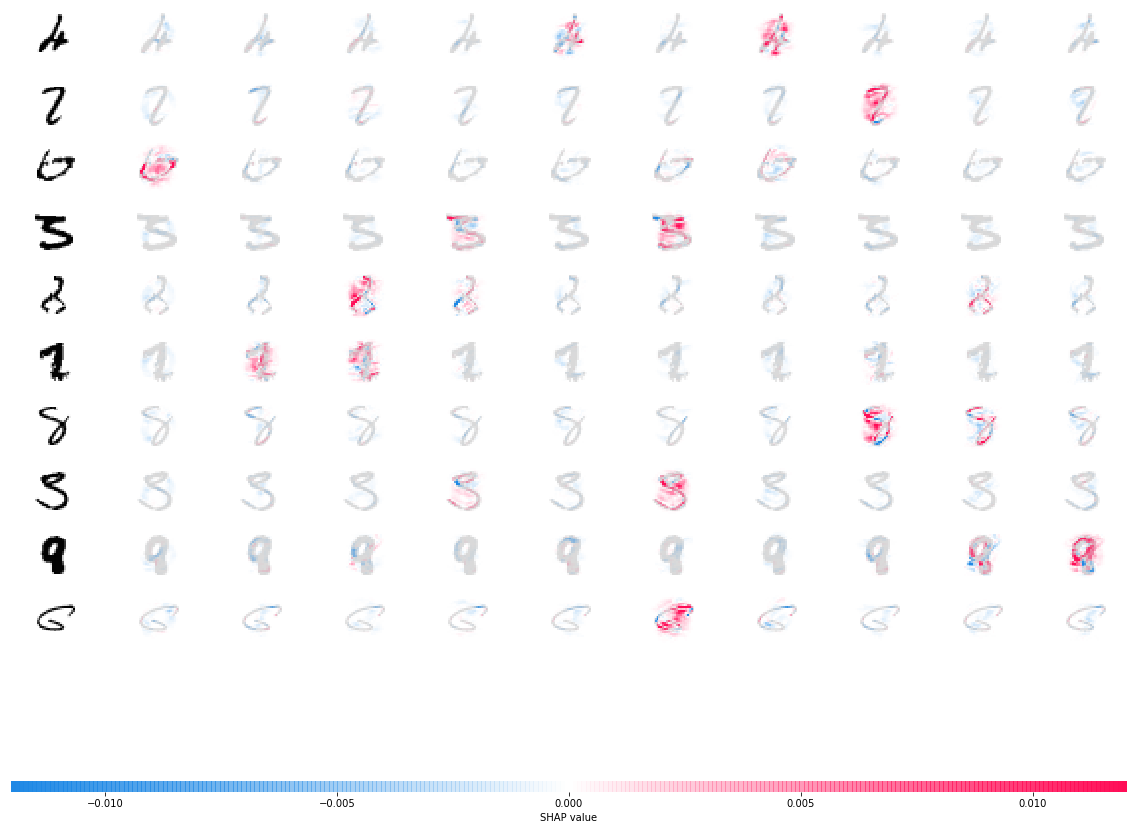

In [28]:
shap_values = e.shap_values(x_test[fail_index[0:10]])
shap.image_plot(shap_values, -x_test[fail_index[0:10]])